In [37]:
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt

#Plotting distributions and histograms

Max value= -3.2044013443296304    Min value= 2.6799103079793154
nbins= 19 with a step size of 0.300000


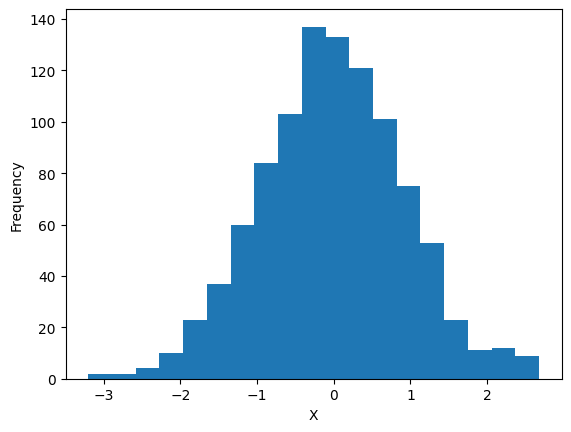

In [77]:
np.random.seed(10)
x = np.random.randn(1000)
print('Max value=', np.min(x), '   Min value=', np.max(x))

bin_size=0.3
nbins=int( (x.max() - x.min()) /bin_size)
print("nbins=", nbins, "with a step size of %f"%bin_size)
rr, x_edges = np.histogram(x, bins=nbins)

#print(len(x_edges), len(rr))
#xx = x_edges[0:len(x_edges)-1]
#print(len(xx), len(rr))

plt.stairs(rr, edges=x_edges, fill=True)
plt.xlabel('X')
plt.ylabel('Frequency')
plt.show()

In [70]:
from scipy.stats import skew, kurtosis

print("Mean of data =", np.mean(x))
print("Standard deviation of data =", np.std(x))
print("Skewness of distribution =", skew(rr))       #Skewed to right
print("Kurtosis of distribution =", kurtosis(rr))   #Lightly tailed

Mean of data = -0.014556635615470447
Standard deviation of data = 0.9379577571961389
Skewness of distribution = 0.5160451084002309
Kurtosis of distribution = -1.210626749142374


# Data interpolation in Python



In [38]:
xs = np.arange(10)
ys = 2*xs + 1
#ys = xs**2 + np.sin(xs) + 1
print("x:",xs)
print("y:",ys)

interp_func = interp1d(xs, ys)

newxarr=np.arange(2.1, 3, 0.1)
newarr = interp_func(np.arange(2.1, 3, 0.1))

print("X values corresponding to the interpolation", newxarr)
print("Interpolated values between 2.1 to 3 with steps of 0.1:", newarr)

x: [0 1 2 3 4 5 6 7 8 9]
y: [ 1  3  5  7  9 11 13 15 17 19]
X values corresponding to the interpolation [2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9]
Interpolated values between 2.1 to 3 with steps of 0.1: [5.2 5.4 5.6 5.8 6.  6.2 6.4 6.6 6.8]


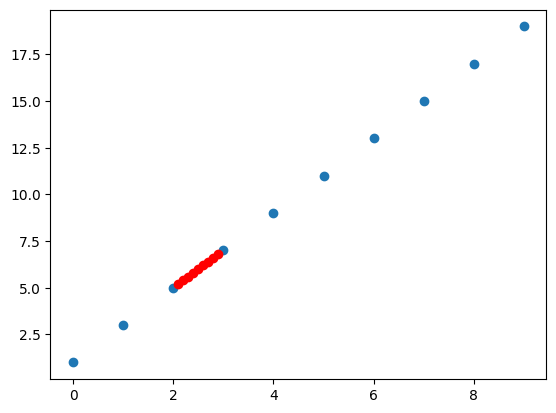

In [39]:
plt.plot(xs, ys, marker='o', linestyle='')
plt.plot(newxarr, newarr, marker='o', linestyle='', color='r')

The above works well for linear function (and interpolation) but may not work so well for most non-linear function (and interpolations). There you can take advantage of the keywords of the interpolate module.

Alternatively and more generally, you can use `spline` interpolation.

In [35]:
from scipy.interpolate import UnivariateSpline
import numpy as np

xs = np.arange(10)
ys = xs**2 + np.sin(xs) + 1
print("x:",xs)
print("y:",ys)

interp_func = UnivariateSpline(xs, ys)

newxarr=np.arange(2.1, 3, 0.1)
newarr = interp_func(np.arange(2.1, 3, 0.1))

print("X values corresponding to the interpolation", newxarr)
print("Interpolated values between 2.1 to 3 with steps of 0.1:", newarr)

x: [0 1 2 3 4 5 6 7 8 9]
y: [ 1.          2.84147098  5.90929743 10.14112001 16.2431975  25.04107573
 36.7205845  50.6569866  65.98935825 82.41211849]
X values corresponding to the interpolation [2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9]
Interpolated values between 2.1 to 3 with steps of 0.1: [5.62826474 6.03987348 6.47131994 6.92265019 7.3939103  7.88514634
 8.39640439 8.92773053 9.47917082]


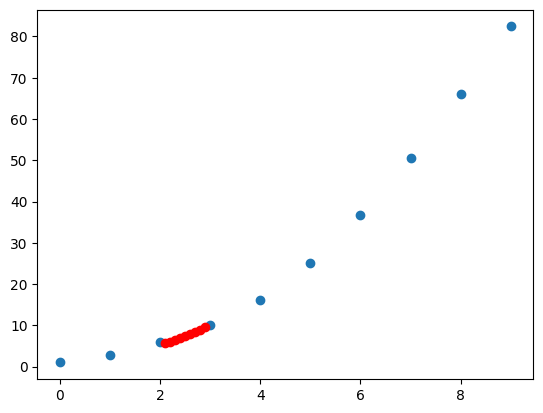

In [36]:
plt.plot(xs, ys, marker='o', linestyle='')
plt.plot(newxarr, newarr, marker='o', linestyle='', color='r')

## Solve Differential Equations in Python

Heavily taken from : https://apmonitor.com/pdc

Differential equations are solved in Python with the Scipy.integrate package using function __odeint__ or __solve_ivp__. Another Python package that solves differential equations is [GEKKO](https://gekko.readthedocs.io/en/latest/). See this [link for the same tutorial in GEKKO](https://apmonitor.com/pdc/Main/PythonDifferentialEquations) versus ODEINT. ODEINT requires three inputs:

```python
y = odeint(model, y0, t)
```

__model__: Function name that returns derivative values at requested y and t values as dydt = model(y,t)

__y0__: Initial conditions of the differential states

__t__: Time points at which the solution should be reported. Additional internal points are often calculated to maintain accuracy of the solution but are not reported.

## Example Problem

An example of using _odeint_ is with the following differential equation with parameter $k=0.3$, the initial condition $y_0=5$ and the following differential equation.

$\frac{dy(t)}{dt} = -k \; y(t)$

The Python code first imports the needed Numpy, Scipy, and Matplotlib packages. The model, initial conditions, and time points are defined as inputs to _odeint_ to numerically calculate $y(t)$.

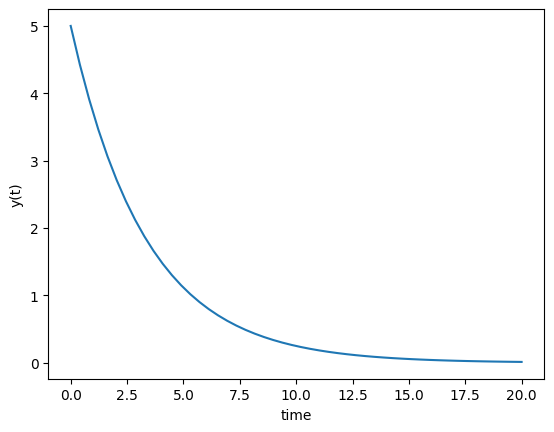

In [71]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t):
    k = 0.3
    dydt = -k * y
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0,20)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

## Additional Input Arguments

An optional fourth input is _args_ that allows additional information to be passed into the _model_ function. The _args_ input is a tuple sequence of values. The argument $k$ is now an input to the _model_ function by including an addition argument.

```python
y = odeint(model, y0, t, args)
```

__args__: Additional inputs to the model.

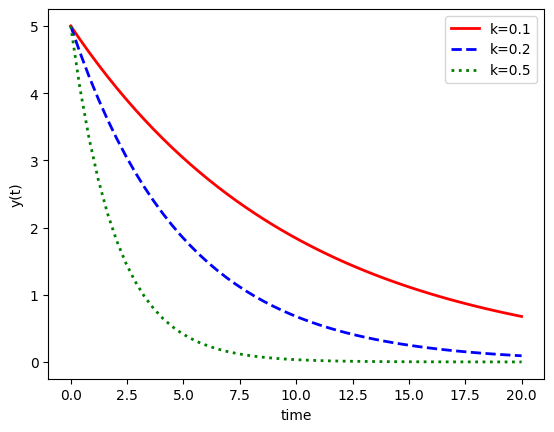

In [72]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t,k):
    dydt = -k * y
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0,20)

# solve ODEs
k = 0.1
y1 = odeint(model,y0,t,args=(k,))
k = 0.2
y2 = odeint(model,y0,t,args=(k,))
k = 0.5
y3 = odeint(model,y0,t,args=(k,))

# plot results
plt.plot(t,y1,'r-',linewidth=2,label='k=0.1')
plt.plot(t,y2,'b--',linewidth=2,label='k=0.2')
plt.plot(t,y3,'g:',linewidth=2,label='k=0.5')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

## Exercises

Find a numerical solution to the following differential equations with the associated initial conditions. Expand the requested time horizon until the solution reaches a steady state. Show a plot of the states ($x(t)$ and/or $y(t)$). Report the final value of each state as $t \to \infty$.

## Problem 1

$\frac{dy(t)}{dt} = -y(t) + 1$

$y(0) = 0$

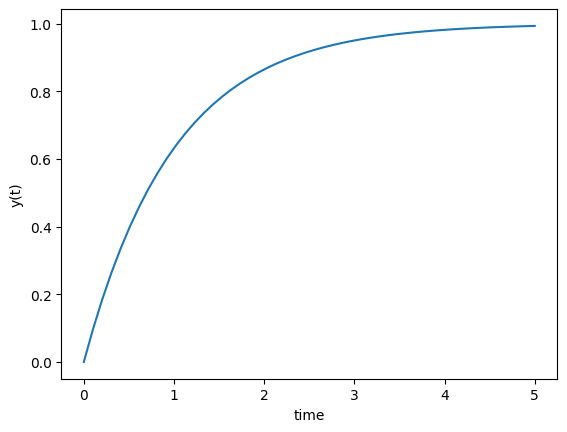

In [73]:
# function that returns dy/dt
def model(y,t):
    dydt = -y + 1.0
    return dydt

# initial condition
y0 = 0

# time points
t = np.linspace(0,5)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

## Problem 2

$5 \; \frac{dy(t)}{dt} = -y(t) + u(t)$

$y(0) = 1$

$u$ jumps from $0$ to $2$ at $t=10$

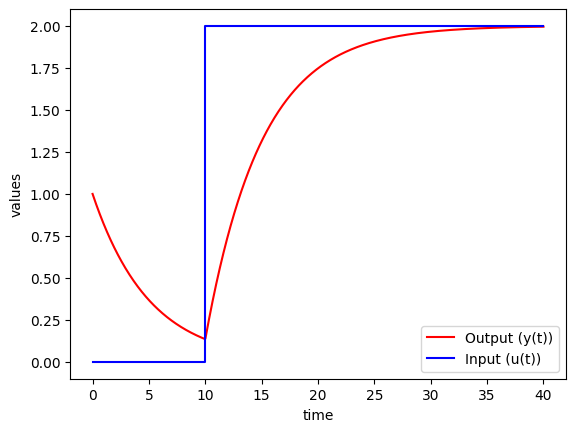

In [74]:
# function that returns dy/dt
def model(y,t):
    # u steps from 0 to 2 at t=10
    if t<10.0:
        u = 0
    else:
        u = 2
    dydt = (-y + u)/5.0
    return dydt

# initial condition
y0 = 1

# time points
t = np.linspace(0,40,1000)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y,'r-',label='Output (y(t))')
plt.plot([0,10,10,40],[0,0,2,2],'b-',label='Input (u(t))')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

## Problem 3

Solve for $x(t)$ and $y(t)$ and show that the solutions are equivalent.

$\frac{dx(t)}{dt} = 3 \; exp(-t)$

$\frac{dy(t)}{dt} = 3 - y(t)$

$x(0) = 0$

$y(0) = 0$

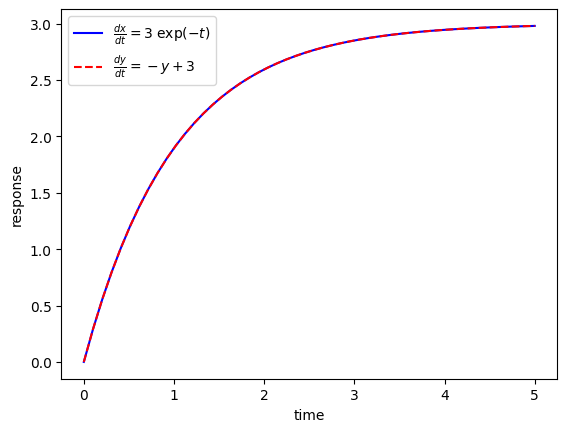

In [75]:
# function that returns dz/dt
def model(z,t):
    dxdt = 3.0 * np.exp(-t)
    dydt = -z[1] + 3
    dzdt = [dxdt,dydt]
    return dzdt

# initial condition
z0 = [0,0]

# time points
t = np.linspace(0,5)

# solve ODE
z = odeint(model,z0,t)

# plot results
plt.plot(t,z[:,0],'b-',label=r'$\frac{dx}{dt}=3 \; \exp(-t)$')
plt.plot(t,z[:,1],'r--',label=r'$\frac{dy}{dt}=-y+3$')
plt.ylabel('response')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

## Problem 4

$2 \; \frac{dx(t)}{dt} = -x(t) + u(t)$

$5 \; \frac{dy(t)}{dt} = -y(t) + x(t)$

$u = 2 \, S(t-5)$

$x(0) = 0$

$y(0) = 0$

where $S(t-5)$ is a step function that changes from zero to one at $t=5$. When it is multiplied by two, it changes from zero to two at that same time, $t=5$.

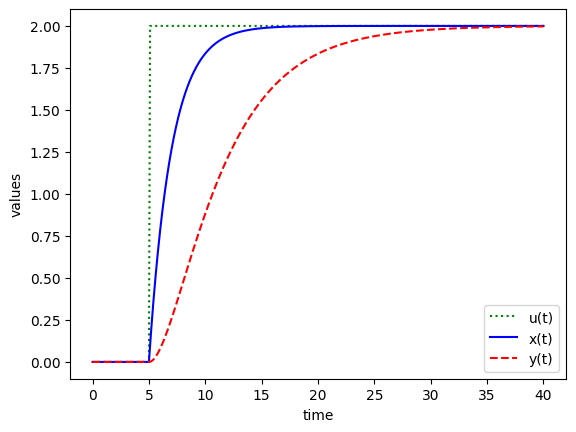

In [76]:
# function that returns dz/dt
def model(z,t,u):
    x = z[0]
    y = z[1]
    dxdt = (-x + u)/2.0
    dydt = (-y + x)/5.0
    dzdt = [dxdt,dydt]
    return dzdt

# initial condition
z0 = [0,0]

# number of time points
n = 401

# time points
t = np.linspace(0,40,n)

# step input
u = np.zeros(n)
# change to 2.0 at time = 5.0
u[51:] = 2.0

# store solution
x = np.empty_like(t)
y = np.empty_like(t)
# record initial conditions
x[0] = z0[0]
y[0] = z0[1]

# solve ODE
for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(u[i],))
    # store solution for plotting
    x[i] = z[1][0]
    y[i] = z[1][1]
    # next initial condition
    z0 = z[1]

# plot results
plt.plot(t,u,'g:',label='u(t)')
plt.plot(t,x,'b-',label='x(t)')
plt.plot(t,y,'r--',label='y(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()